In [4]:
# For Data Manipulation & Numerical Operations
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For Statistical Analysis
import statsmodels.api as sm

# To Load the dataset
df = pd.read_csv('D:/data_insurance.csv')

# For Initial data inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())

Dataset Shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


I am using Jupyter Notebook therefore I have used "%matplotlib inline" in line 8. It could be omitted

In [5]:
# Display basic descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Variables:")
print(df.describe())

# Display value counts for categorical variables
print("\nValue Counts for Categorical Variables:")
print("Sex distribution:")
print(df['sex'].value_counts())
print("\nSmoker distribution:")
print(df['smoker'].value_counts())
print("\nRegion distribution:")
print(df['region'].value_counts())

# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())

Descriptive Statistics for Numerical Variables:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Value Counts for Categorical Variables:
Sex distribution:
sex
male      676
female    662
Name: count, dtype: int64

Smoker distribution:
smoker
no     1064
yes     274
Name: count, dtype: int64

Region distribution:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Missing Values Check:
age         0
sex         0
bmi         0
children    0
smoker      0
region   

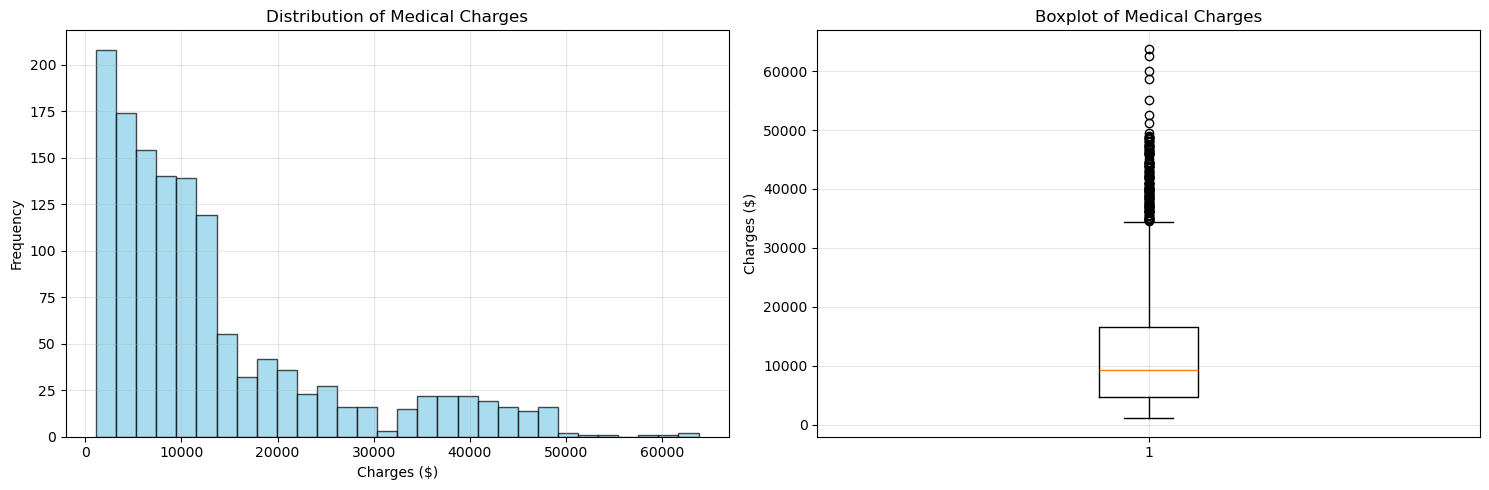

Skewness of charges: 1.5159
Mean charges: $13270.42
Median charges: $9382.03


In [6]:
# Set up the visualization style
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of charges
ax1.hist(df['charges'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Medical Charges')
ax1.set_xlabel('Charges ($)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Boxplot of charges
ax2.boxplot(df['charges'])
ax2.set_title('Boxplot of Medical Charges')
ax2.set_ylabel('Charges ($)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate skewness
skewness = df['charges'].skew()
print(f"Skewness of charges: {skewness:.4f}")
print(f"Mean charges: ${df['charges'].mean():.2f}")
print(f"Median charges: ${df['charges'].median():.2f}")

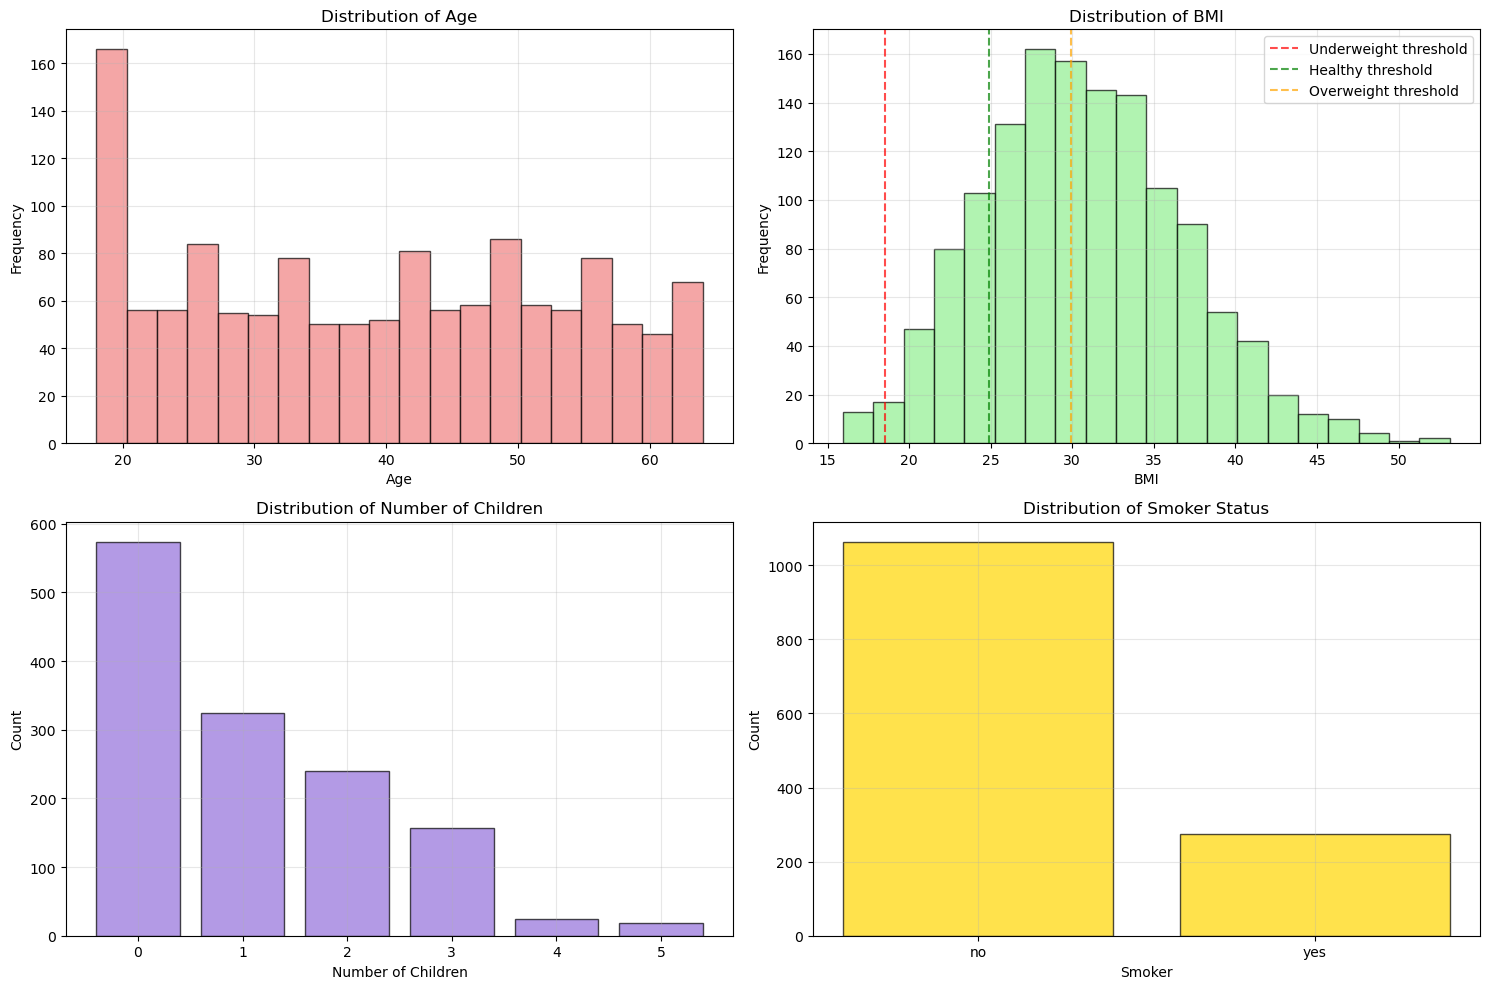

Average age: 39.2 years
Average BMI: 30.7
Percentage of smokers: 20.5%


In [7]:
# Set up the figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Age distribution
axes[0, 0].hist(df['age'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: BMI distribution
axes[0, 1].hist(df['bmi'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of BMI')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(18.5, color='red', linestyle='--', alpha=0.7, label='Underweight threshold')
axes[0, 1].axvline(24.9, color='green', linestyle='--', alpha=0.7, label='Healthy threshold')
axes[0, 1].axvline(29.9, color='orange', linestyle='--', alpha=0.7, label='Overweight threshold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Children count distribution
children_counts = df['children'].value_counts().sort_index()
axes[1, 0].bar(children_counts.index, children_counts.values, alpha=0.7, color='mediumpurple', edgecolor='black')
axes[1, 0].set_title('Distribution of Number of Children')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Smoker distribution
smoker_counts = df['smoker'].value_counts()
axes[1, 1].bar(smoker_counts.index, smoker_counts.values, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Distribution of Smoker Status')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print(f"Average age: {df['age'].mean():.1f} years")
print(f"Average BMI: {df['bmi'].mean():.1f}")
print(f"Percentage of smokers: {(df['smoker'] == 'yes').mean() * 100:.1f}%")

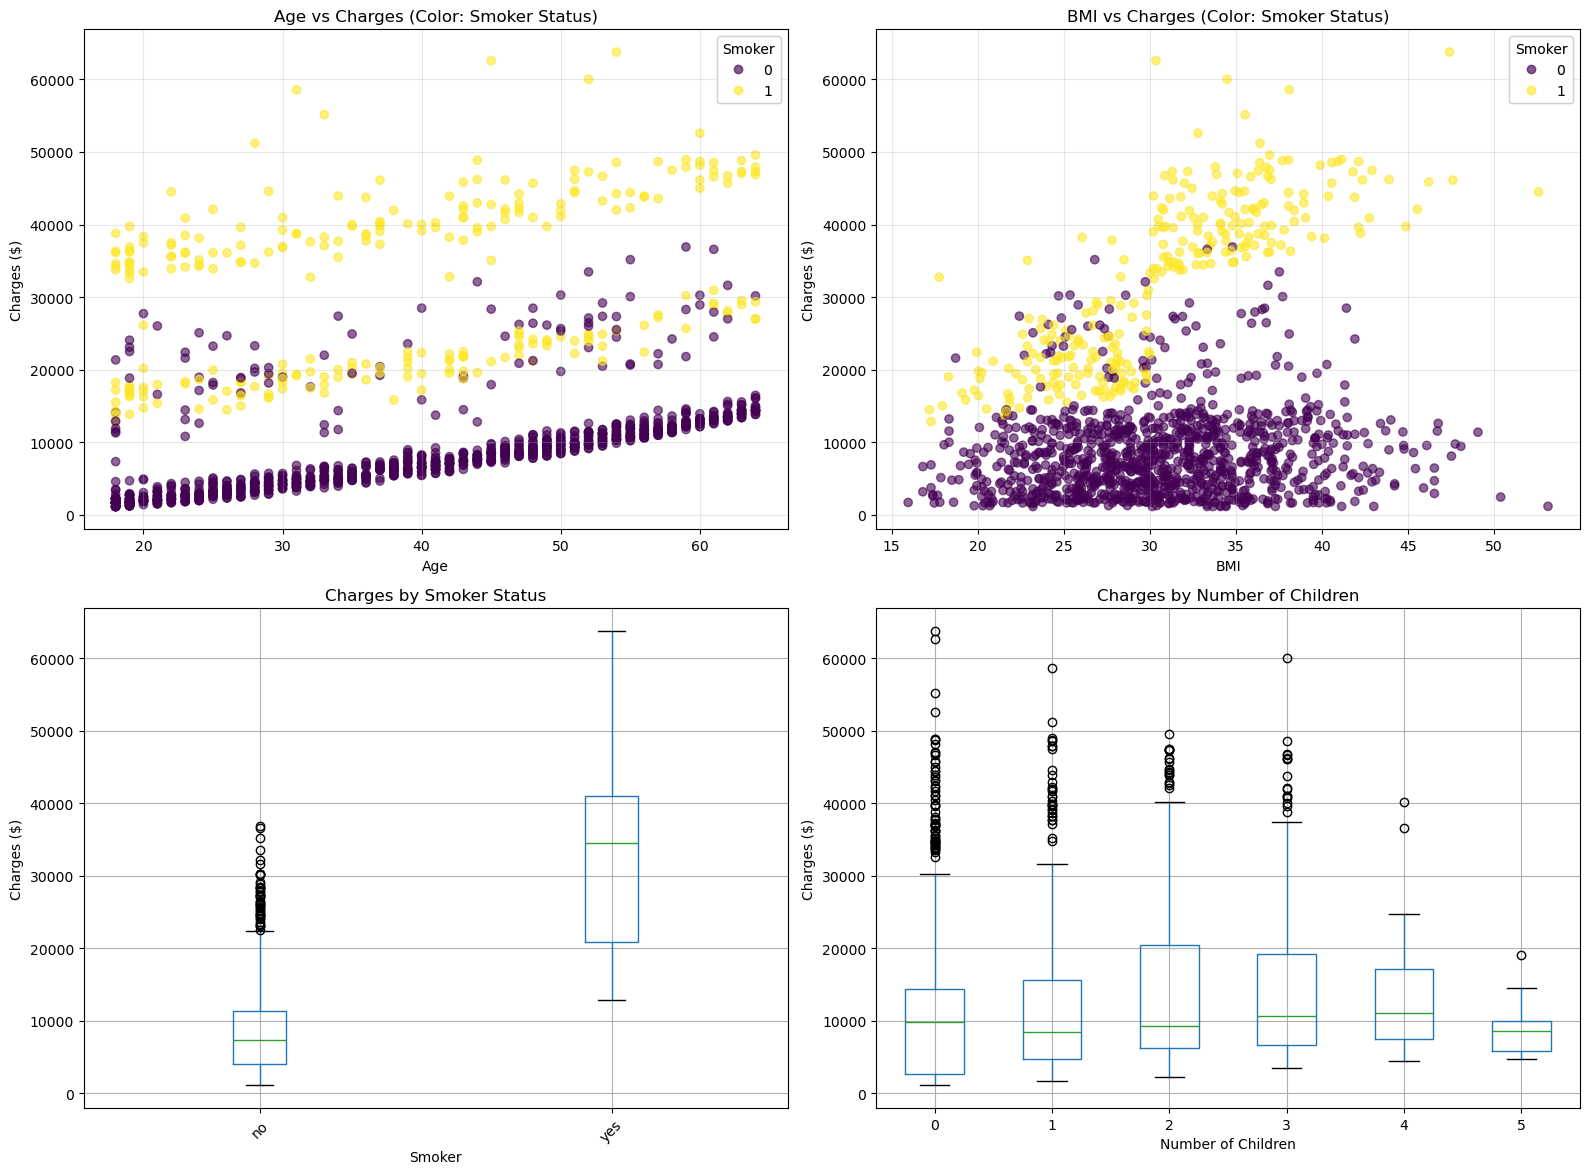

Correlation Matrix (Numerical Variables):
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [8]:
# Set up the figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Age vs Charges (colored by smoker status)
scatter1 = axes[0, 0].scatter(df['age'], df['charges'], c=df['smoker'].map({'yes': 1, 'no': 0}), 
                             alpha=0.6, cmap='viridis')
axes[0, 0].set_title('Age vs Charges (Color: Smoker Status)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges ($)')
axes[0, 0].grid(True, alpha=0.3)
legend1 = axes[0, 0].legend(*scatter1.legend_elements(), title="Smoker")
axes[0, 0].add_artist(legend1)

# Plot 2: BMI vs Charges (colored by smoker status)
scatter2 = axes[0, 1].scatter(df['bmi'], df['charges'], c=df['smoker'].map({'yes': 1, 'no': 0}), 
                             alpha=0.6, cmap='viridis')
axes[0, 1].set_title('BMI vs Charges (Color: Smoker Status)')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges ($)')
axes[0, 1].grid(True, alpha=0.3)
legend2 = axes[0, 1].legend(*scatter2.legend_elements(), title="Smoker")
axes[0, 1].add_artist(legend2)

# Plot 3: Boxplot of Charges by Smoker Status
df.boxplot(column='charges', by='smoker', ax=axes[1, 0])
axes[1, 0].set_title('Charges by Smoker Status')
axes[1, 0].set_xlabel('Smoker')
axes[1, 0].set_ylabel('Charges ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Boxplot of Charges by Number of Children
df.boxplot(column='charges', by='children', ax=axes[1, 1])
axes[1, 1].set_title('Charges by Number of Children')
axes[1, 1].set_xlabel('Number of Children')
axes[1, 1].set_ylabel('Charges ($)')

plt.suptitle('')  # Remove automatic subtitle
plt.tight_layout()
plt.show()

# Calculate correlation matrix for numerical variables
numeric_df = df[['age', 'bmi', 'children', 'charges']]
correlation_matrix = numeric_df.corr()
print("Correlation Matrix (Numerical Variables):")
print(correlation_matrix)

In [9]:
# Create new features based on insights from EDA
df['age_squared'] = df['age'] ** 2  # Capture potential non-linear relationship with age

# Create interaction term: BMI * Smoker
df['bmi_smoker_interaction'] = df['bmi'] * (df['smoker'] == 'yes').astype(int)

# Create another interaction: Age * Smoker
df['age_smoker_interaction'] = df['age'] * (df['smoker'] == 'yes').astype(int)

# Verify the new features
print("New features created:")
print(f"- age_squared: range {df['age_squared'].min()} to {df['age_squared'].max()}")
print(f"- bmi_smoker_interaction: {df['bmi_smoker_interaction'].sum():.0f} non-zero values (smokers)")
print(f"- age_smoker_interaction: {df['age_smoker_interaction'].sum():.0f} non-zero values (smokers)")

# Show first 5 rows with new features
print("\nSample data with new features:")
print(df[['age', 'age_squared', 'bmi', 'smoker', 'bmi_smoker_interaction', 'age_smoker_interaction']].head(10))

# Quick check of correlation with charges for new features
new_features_corr = df[['age_squared', 'bmi_smoker_interaction', 'age_smoker_interaction', 'charges']].corr()
print("\nCorrelation of new features with charges:")
print(new_features_corr['charges'].sort_values(ascending=False))

New features created:
- age_squared: range 324 to 4096
- bmi_smoker_interaction: 8414 non-zero values (smokers)
- age_smoker_interaction: 10553 non-zero values (smokers)

Sample data with new features:
   age  age_squared     bmi smoker  bmi_smoker_interaction  \
0   19          361  27.900    yes                    27.9   
1   18          324  33.770     no                     0.0   
2   28          784  33.000     no                     0.0   
3   33         1089  22.705     no                     0.0   
4   32         1024  28.880     no                     0.0   
5   31          961  25.740     no                     0.0   
6   46         2116  33.440     no                     0.0   
7   37         1369  27.740     no                     0.0   
8   37         1369  29.830     no                     0.0   
9   60         3600  25.840     no                     0.0   

   age_smoker_interaction  
0                      19  
1                       0  
2                       0  
3  

In [10]:
# Define the features (X) and target (y)
X = df[['age', 'age_squared', 'bmi', 'children', 'bmi_smoker_interaction', 'age_smoker_interaction', 'sex', 'smoker', 'region']]
y = df['charges']

# Display the shape and feature names
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Features shape: (1338, 9)
Target shape: (1338,)

Feature names:
['age', 'age_squared', 'bmi', 'children', 'bmi_smoker_interaction', 'age_smoker_interaction', 'sex', 'smoker', 'region']

Training set size: 1070 samples
Testing set size: 268 samples
Number of features: 9


In [12]:
# Recreate the preprocessing pipeline (to ensure all variables are defined)
numerical_features = ['age', 'age_squared', 'bmi', 'children', 'bmi_smoker_interaction', 'age_smoker_interaction']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Now train the model on the training data
model.fit(X_train, y_train)

# Display training completion message
print("Model training completed successfully!")
print(f"Model trained on {X_train.shape[0]} samples with {X_train.shape[1]} features")

# Check if the model has been fitted
print(f"Model is fitted: {model.named_steps['regressor'].coef_ is not None}")

# Get the number of coefficients
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
print(f"\nNumber of coefficients in the model: {len(model.named_steps['regressor'].coef_)}")
print(f"Number of feature names after preprocessing: {len(feature_names)}")

# Show the intercept term
intercept = model.named_steps['regressor'].intercept_
print(f"Model intercept: ${intercept:,.2f}")

Model training completed successfully!
Model trained on 1070 samples with 9 features
Model is fitted: True

Number of coefficients in the model: 11
Number of feature names after preprocessing: 11
Model intercept: $18,686.84


 Model Performance Evaluation:
Mean Squared Error (MSE): $20,596,982.36
Root Mean Squared Error (RMSE): $4,538.39
R-squared (R²) Score: 0.8673


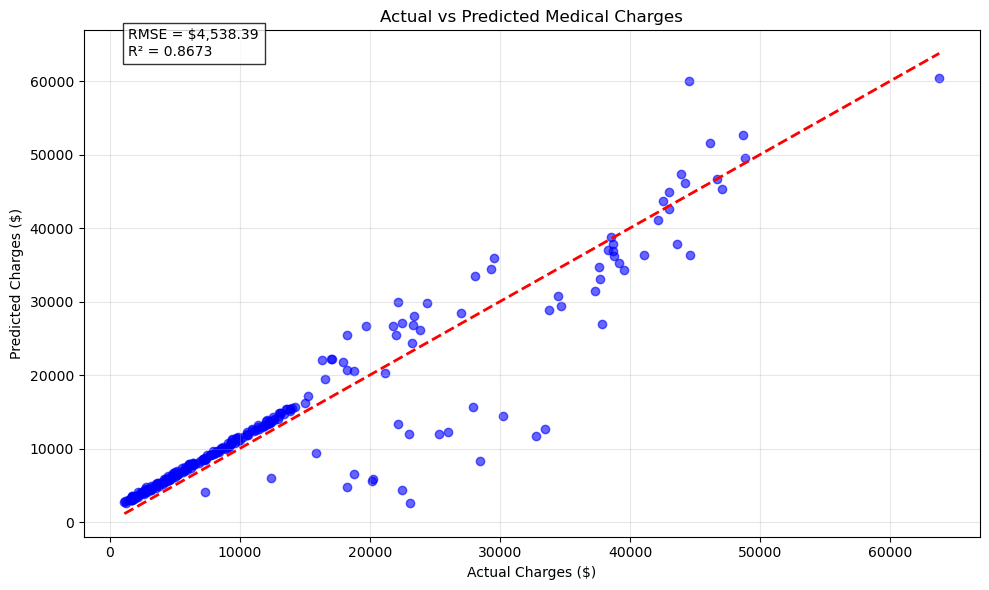


 Sample Predictions (First 10 test samples):
       Actual   Predicted  Difference
0   $9,095.07  $10,768.08  $-1,673.01
1   $5,272.18   $6,536.15  $-1,263.97
2  $29,330.98  $34,484.71  $-5,153.73
3   $9,301.89  $10,550.70  $-1,248.81
4  $33,750.29  $28,803.49   $4,946.81
5   $4,536.26   $5,778.85  $-1,242.59
6   $2,117.34   $3,542.71  $-1,425.37
7  $14,210.54  $15,676.74  $-1,466.20
8   $3,732.63   $5,364.99  $-1,632.36
9  $10,264.44  $11,555.50  $-1,291.06


In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display performance metrics
print(" Model Performance Evaluation:")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Create actual vs predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title('Actual vs Predicted Medical Charges')
plt.grid(True, alpha=0.3)

# Add RMSE and R² to plot
plt.text(0.05, 0.95, f'RMSE = ${rmse:,.2f}\nR² = {r2:.4f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Compare actual vs predicted for first 10 test samples
print("\n Sample Predictions (First 10 test samples):")
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10],
    'Difference': y_test.values[:10] - y_pred[:10]
})
comparison['Actual'] = comparison['Actual'].apply(lambda x: f"${x:,.2f}")
comparison['Predicted'] = comparison['Predicted'].apply(lambda x: f"${x:,.2f}")
comparison['Difference'] = comparison['Difference'].apply(lambda x: f"${x:,.2f}")
print(comparison)

Top 10 Most Influential Factors on Insurance Costs:
                        Feature   Coefficient
7               cat__smoker_yes -21294.958614
4   num__bmi_smoker_interaction  18590.943673
1              num__age_squared   4282.539114
10        cat__region_southwest  -1180.415996
9         cat__region_southeast   -951.020251
3                 num__children    754.153616
8         cat__region_northwest   -625.399786
0                      num__age   -542.947387
6                 cat__sex_male   -527.083059
2                      num__bmi     74.873678

Interpretation Guide:
Positive coefficient = Higher feature value corresponds to Higher cost
Negative coefficient = Higher feature value corresponds to Lower cost


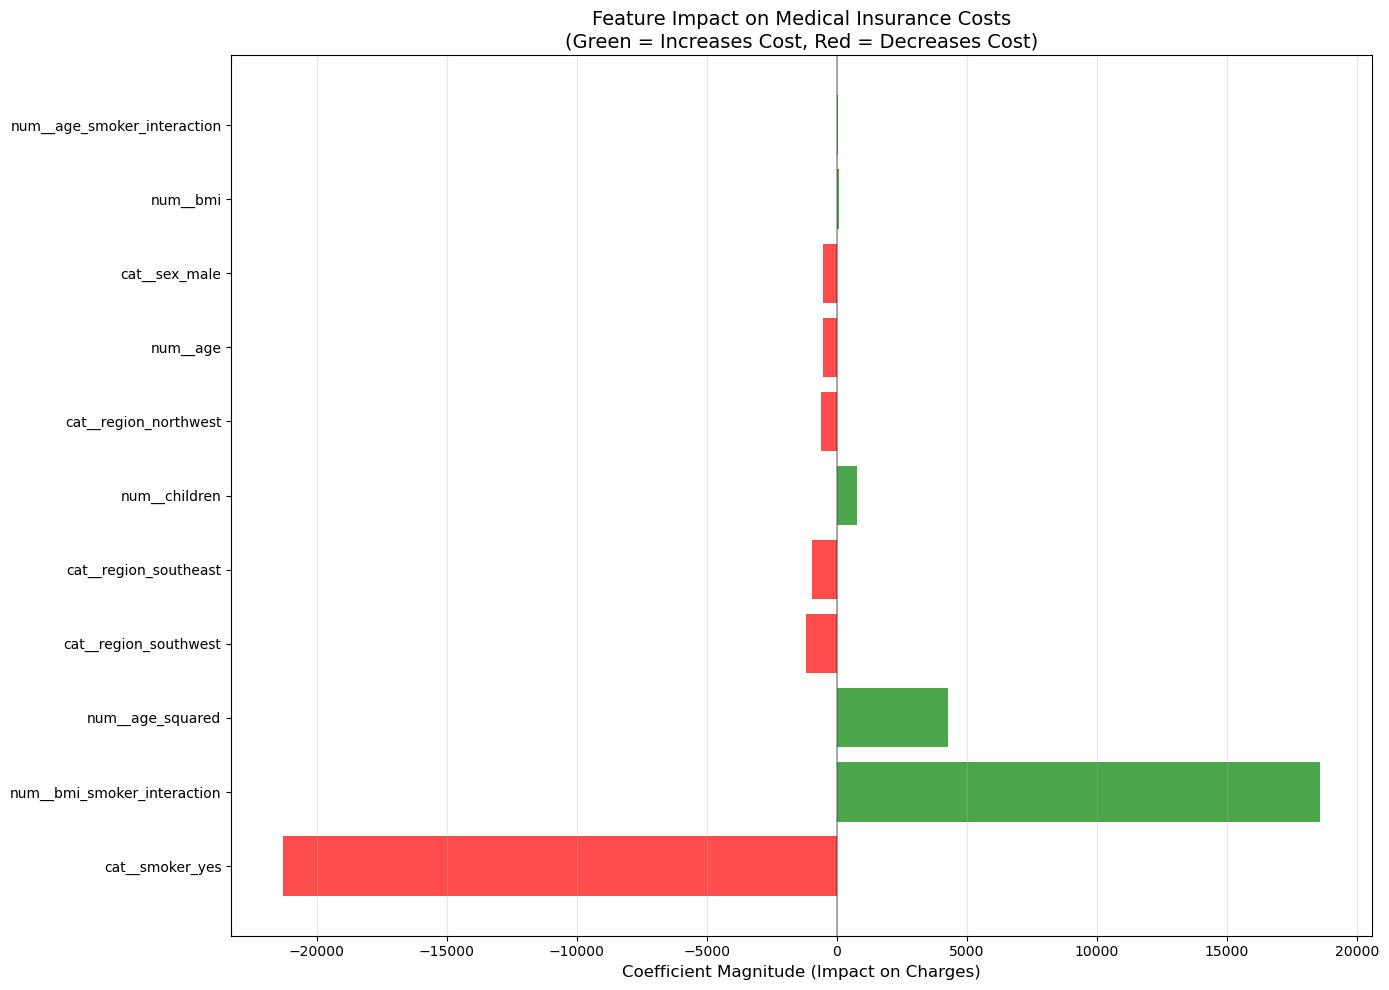


 Key Insights from Coefficient Analysis:
1. Smoker Status: The strongest predictor by far
2. Age Effects: Both linear (age) and quadratic (age_squared) terms matter
3. BMI Impact: Significant effect, especially when combined with smoking
4. Demographic Factors: Region and sex have smaller but meaningful effects


In [15]:
# Get feature names and coefficients from the trained model
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame for clear analysis
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Effect': np.abs(coefficients)  # Magnitude of effect
}).sort_values('Abs_Effect', ascending=False)

print("Top 10 Most Influential Factors on Insurance Costs:")
print(coef_df[['Feature', 'Coefficient']].head(10))

print("\n" + "="*60)
print("Interpretation Guide:")
print("Positive coefficient = Higher feature value corresponds to Higher cost")
print("Negative coefficient = Higher feature value corresponds to Lower cost")
print("="*60)

# Plot the coefficients
plt.figure(figsize=(14, 10))
colors = ['red' if coef < 0 else 'green' for coef in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Magnitude (Impact on Charges)', fontsize=12)
plt.title('Feature Impact on Medical Insurance Costs\n(Green = Increases Cost, Red = Decreases Cost)', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Detailed interpretation of key features
print("\n Key Insights from Coefficient Analysis:")
print("1. Smoker Status: The strongest predictor by far")
print("2. Age Effects: Both linear (age) and quadratic (age_squared) terms matter")
print("3. BMI Impact: Significant effect, especially when combined with smoking")
print("4. Demographic Factors: Region and sex have smaller but meaningful effects")

In [17]:
print("\n" + "="*65)
print("MODEL PERFORMANCE SUMMARY:")
print(f"R² = {r2:.4f} → Model explains {r2*100:.1f}% of variance in medical charges")
print(f"RMSE = ${rmse:,.2f} → Average prediction error")
print(f"MSE = ${mse:,.2f} → Mean squared error")


MODEL PERFORMANCE SUMMARY:
R² = 0.8673 → Model explains 86.7% of variance in medical charges
RMSE = $4,538.39 → Average prediction error
MSE = $20,596,982.36 → Mean squared error
